In [3]:

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import log_loss, make_scorer


/home/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
matchup_data = pd.read_csv("data/matchup_data.csv")
x_data = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y_data = matchup_data.radiant_winner

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 14)
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train, y_train)
prediction = dict()
prediction['Logistic'] = knn.predict(x_test)

print('Log: ',accuracy_score(y_test, prediction['Logistic']))


conf_mat_logist = confusion_matrix(y_test, prediction['Logistic'])
print('Logist \r', conf_mat_logist)

Log:  0.626984126984127
 [[30 28]
 [19 49]]


In [19]:
knn.score(x_test,y_test)

0.626984126984127

In [20]:
scores=cross_val_score(knn,x_data,y_data,cv=10,scoring='accuracy')

In [21]:
print(scores)

[0.64102564 0.68421053 0.65789474 0.63157895 0.55263158 0.73684211
 0.52631579 0.76315789 0.68421053 0.57894737]


In [22]:
print(scores.mean()) # out of sample accuracy

0.6456815114709851


In [23]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_data, y_data, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



[0.5851551956815115, 0.5748313090418353, 0.5802294197031038, 0.5960188933873144, 0.5854251012145749, 0.5724696356275304, 0.582995951417004, 0.5725371120107962, 0.5959514170040485, 0.5881916329284751, 0.6065452091767881, 0.5960188933873145, 0.6221997300944669, 0.6141700404858299, 0.6404858299595141, 0.6456815114709851, 0.6327260458839407, 0.6248313090418354, 0.6327260458839407, 0.6116734143049932, 0.6222672064777328, 0.6089743589743589, 0.608974358974359, 0.6010796221322537, 0.6064102564102565, 0.6064102564102564, 0.6117408906882591, 0.6195006747638326, 0.6300944669365723, 0.6352901484480433]


Text(0,0.5,'Cross-Validated Accuracy')

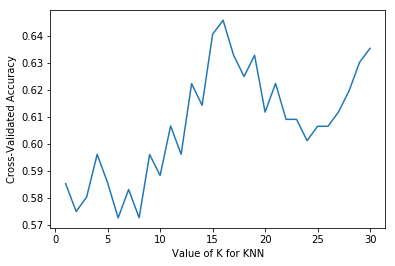

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')